# Выбор локации для скважины

## Загрузка и подготовка данных

In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import seaborn as sns

In [2]:
df0 = pd.read_csv('/datasets/geo_data_0.csv')
df1 = pd.read_csv('/datasets/geo_data_1.csv')
df2 = pd.read_csv('/datasets/geo_data_2.csv')

In [3]:
def region_info(df):
    
    display(df.head())
    display(df.info())
    display(df.describe())
    
    ax = sns.boxplot(x=df['product'])
    ax.set_title('Объём запасов в скважине')

,id,f0,f1,f2,product
0,txEyH,0.705745,-0.497823,1.221170,105.280062
1,2acmU,1.334711,-0.340164,4.365080,73.037750
2,409Wp,1.022732,0.151990,1.419926,85.265647
3,iJLyR,-0.032172,0.139033,2.978566,168.620776
4,Xdl7t,1.988431,0.155413,4.751769,154.036647


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.500419,0.250143,2.502647,92.500000
std,0.871832,0.504433,3.248248,44.288691
min,-1.408605,-0.848218,-12.088328,0.000000
25%,-0.072580,-0.200881,0.287748,56.497507
50%,0.502360,0.250252,2.515969,91.849972
75%,1.073581,0.700646,4.715088,128.564089
max,2.362331,1.343769,16.003790,185.364347


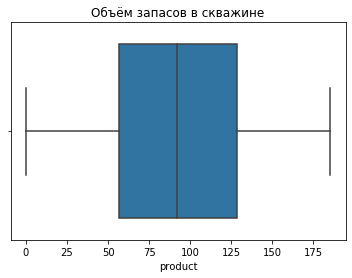

In [4]:
region_info(df0)

,id,f0,f1,f2,product
0,kBEdx,-15.001348,-8.276000,-0.005876,3.179103
1,62mP7,14.272088,-3.475083,0.999183,26.953261
2,vyE1P,6.263187,-5.948386,5.001160,134.766305
3,KcrkZ,-13.081196,-11.506057,4.999415,137.945408
4,AHL4O,12.702195,-8.147433,5.004363,134.766305


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,1.141296,-4.796579,2.494541,68.825000
std,8.965932,5.119872,1.703572,45.944423
min,-31.609576,-26.358598,-0.018144,0.000000
25%,-6.298551,-8.267985,1.000021,26.953261
50%,1.153055,-4.813172,2.011479,57.085625
75%,8.621015,-1.332816,3.999904,107.813044
max,29.421755,18.734063,5.019721,137.945408


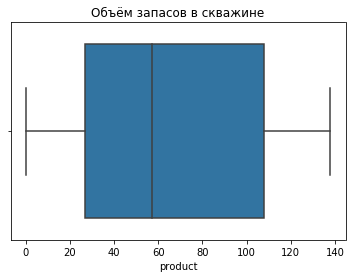

In [5]:
region_info(df1)

,id,f0,f1,f2,product
0,fwXo0,-1.146987,0.963328,-0.828965,27.758673
1,WJtFt,0.262778,0.269839,-2.530187,56.069697
2,ovLUW,0.194587,0.289035,-5.586433,62.871910
3,q6cA6,2.236060,-0.553760,0.930038,114.572842
4,WPMUX,-0.515993,1.716266,5.899011,149.600746


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 5 columns):
id         100000 non-null object
f0         100000 non-null float64
f1         100000 non-null float64
f2         100000 non-null float64
product    100000 non-null float64
dtypes: float64(4), object(1)
memory usage: 3.8+ MB


None

,f0,f1,f2,product
count,100000.000000,100000.000000,100000.000000,100000.000000
mean,0.002023,-0.002081,2.495128,95.000000
std,1.732045,1.730417,3.473445,44.749921
min,-8.760004,-7.084020,-11.970335,0.000000
25%,-1.162288,-1.174820,0.130359,59.450441
50%,0.009424,-0.009482,2.484236,94.925613
75%,1.158535,1.163678,4.858794,130.595027
max,7.238262,7.844801,16.739402,190.029838


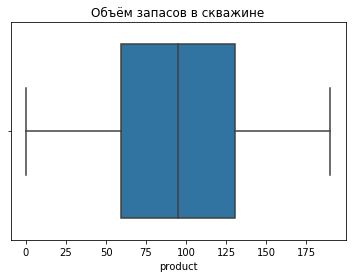

In [6]:
region_info(df2)

### Вывод.
Пропуски в данных отсутствуют. Распределение целевого признака близко к нормальному.

## Обучение и проверка модели

Для обучения модели используем линейную регрессию. Расчитаем средний запас предсказанного сырья и RMSE модели.

In [7]:
regions = {0: 'Первый регион', 1: 'Второй регион', 2: 'Третий регион'}

def region_predict(df, regions):
    
    target = df['product']
    features = df.drop(['id', 'product'], axis=1)

    features_train, features_valid, target_train, target_valid = train_test_split(
        features, target, test_size=0.25, random_state=12345)

    model = LinearRegression()
    model.fit(features_train, target_train)
    predicted_valid = model.predict(features_valid)
    
    rmse = mean_squared_error(target_valid, predicted_valid)**0.5
    product_mean_pred = predicted_valid.mean()
    
    print(regions)
    print(f'RMSE: {rmse:.2f}')
    print(f'Средний запас предсказанного сырья: {product_mean_pred:.2f}')
    
    return predicted_valid, target_valid

Сохраним предсказания и правильные ответы на валидационной выборке, а также оценим значения среднего запаса предсказанного сырья и RMSE модели.

In [8]:
predicted_valid_0, target_valid_0 = region_predict(df0, regions[0])

Первый регион
RMSE: 37.58
Средний запас предсказанного сырья: 92.59


In [9]:
predicted_valid_1, target_valid_1 = region_predict(df1, regions[1])

Второй регион
RMSE: 0.89
Средний запас предсказанного сырья: 68.73


In [10]:
predicted_valid_2, target_valid_2 = region_predict(df2, regions[2])

Третий регион
RMSE: 40.03
Средний запас предсказанного сырья: 94.97


## Подготовка к расчёту прибыли

Определим переменые для всех ключевых значений, необходимых для расчётов.

In [11]:
TOTAL_WELLS = 500
BEST_WELLS = 200
BUDGET = 10000000000
BARREL_PROFIT = 450000

Рассчитаем достаточный объём сырья для безубыточной разработки новой скважины.

In [12]:
print(f'Достаточный объём сырья для безубыточной разработки новой скважины: {(BUDGET / (BEST_WELLS * BARREL_PROFIT)):.2f}')

Достаточный объём сырья для безубыточной разработки новой скважины: 111.11


### Вывод.
Средний запас в регионах меньше достаточного объёма сырья для безубыточной разработки новой скважины.

## Расчёт прибыли и рисков 

Расчитаем прибыль по выбранным скважинам и предсказаниям модели.

In [13]:
def profit(target, probabilities):
    
    probabilities = pd.Series(probabilities, index=target.index)
    
    probs_sorted = probabilities.sort_values(ascending=False)
    selected = target[probs_sorted.index][:BEST_WELLS]
    target_profit = selected.sum() * BARREL_PROFIT - BUDGET
        
    return target_profit / 1000000000

Посчитаем риски и прибыль для каждого региона.

In [14]:
state = np.random.RandomState(12345)

def profit_bootstrap(target, probabilities, regions):
    
    values = []
    
    for i in range(1000):
        target = target.reset_index(drop=True)
        target_subsample = target.sample(n=TOTAL_WELLS, replace=True, random_state=state)
        probs_subsample = probabilities[target_subsample.index]
        values.append(profit(target_subsample, probs_subsample))
        
    values = pd.Series(values)
    mean = values.mean()
    lower = values.quantile(0.025)
    upper = values.quantile(0.975)
    risk_of_material_losses = ((values < 0).mean()) * 100
    
    print(regions)
    print(f'Средняя прибыль: {mean:.3f} млрд рублей')
    print(f'Доверительный интервал: {lower:.3f}, {upper:.3f}')
    print(f'Риск убытков: {risk_of_material_losses:.2f}')

In [15]:
profit_bootstrap(target_valid_0, predicted_valid_0, regions[0])

Первый регион
Средняя прибыль: 0.426 млрд рублей
Доверительный интервал: -0.102, 0.948
Риск убытков: 6.00


In [16]:
profit_bootstrap(target_valid_1, predicted_valid_1, regions[1])

Второй регион
Средняя прибыль: 0.518 млрд рублей
Доверительный интервал: 0.128, 0.954
Риск убытков: 0.30


In [17]:
profit_bootstrap(target_valid_2, predicted_valid_2, regions[2])

Третий регион
Средняя прибыль: 0.420 млрд рублей
Доверительный интервал: -0.116, 0.990
Риск убытков: 6.20


## Вывод.
В результате риск убытков меньше 2,5 % получился только во втором регионе.